# Como a álgebra linear resolve problemas de regressão linear

Sabemos que Regressão Linear é um método muito utilizado. Se você já fez algum curso de ciência de dados ou estatística já deve ter estudado.
O método serve para modelar a relação entre uma ou mais variáveis independentes e uma variável dependente. É considerado um pilar da estatística e frequentemente é considerado um bom método introdutório para aprendizado de máquina. 

Podemos formular o método usando notação de matriz e resolvido por meio de operações matriciais.
Neste tutorial, você vai explorar a formulação matricial da regressão linear e aprender como resolvê-la utilizando métodos diretos e de fatoração de matriz.

Vamos ver:
- Regressão linear e a reformulação matricial com as equações normais.

## Regressão Linear

Queremos modelar a relação entre a variável de input (x) e a variável resposta (y).

y = f(x)


Vamos assumir que nossa função que mapeia x em y é linear, então:

y = b0 + b1 . x1

onde b0 eb1 são os coeficientes da função. 

(Observe q temos é a equação da reta. O modelo de regressão linear é uma reta q melhor se ajusta as nosso dados de input - x)

Podemos ter mútiplos inputs (regressão linear multivariada)


y = b0 + (b1 . x1) + (b2 . x2) + ... + (bn . xn)

Nosso objetivo é criar um modelo que encontra o valor dos coeficientes (b) que minimiza o erro entre o y predito e o y real.

(Observe que encontrando os coeficientes podemos traçar nossa reta para qualquer valor de x e, assim, temos o nosso y predito)

## Notação matricial da Regressão Linear

Podemos escrever a notação matricial da forma:

y = X . b

ou sem o ponto:

y = Xb

Onde X é o conjunto de dados (input) e cada coluna representa uma feature dos dados, b é um vetor de coeficientes, e y é um vetor de variáveis de saída para cada linha em X.



$$
y = \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\end{bmatrix}
= \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
\end{bmatrix}
\begin{bmatrix}
b_1 \\
b_2 \\
b_3 \\
\end{bmatrix}
$$



Reformulado, o problema se torna um sistema de equações lineares onde os valores do vetor b (coenficientes) são desconhecidos.

Perceba que normalmente nossos dados tem mais exemplos do que variáveis, ou seja, a matriz X é comprida com muitas linhas e poucas colunas. Isso ocorre porque nossos dados são organizados na matriz da forma que as colunas são as variáveis (exemplo: peso, altura, etc) e nas linhas temos as observações (x1, x2, ...). 

Perceba que para encontrar o valores de b, temos que resolver um sistema de equações porém temos mais equações do que incógnitas, ou seja, cada coeficiente é usado em cada linha de dados. Em resumo, um sistema com mais equações do que variáveis não vai ter solução. Então, vamos procurar uma solução que seja mais próxima com algum erro, já que não há uma linha que passe exatamente por todos os pontos. Portanto, a abordagem para resolver as equações deve ser capaz de lidar com isso.

**Em resumo:** 

O problema que queremos resolver é: y=Xb . Encontrar o valor do vetor b que fazendo a combinação linear com nosso dados, vai nos dar a reta y.

Mas não tem solução! Não existe uma reta que passe por todos os pontos dos nosso dados. (temos mais equações que variáveis)

Como resolvemos?

Vamos aproximar! Queremos uma reta que melhor de ajuste aos dados.

A maneira típica de lidar com isso é encontrar uma solução na qual os valores de b minimizem o erro quadrático. Isso é chamado de mínimos quadrados lineares.
Em notação de matriz, esse problema é formulado usando a chamada equação normal:

$$
X^T \cdot X \cdot b = X^T \cdot y
$$

Então, a equação normal nos traz a solução que minimiza o erro. 

Vamos pra parte prática!

## Dataset

Usaremos um conjunto de dados simples em 2D, onde os dados são fáceis de visualizar em um gráfico de dispersão e o modelo é fácil de visualizar como uma linha.

O exemplo abaixo define um conjunto de dados em forma de matriz 5x2, o divide em componentes X e y, e representa o conjunto de dados como um gráfico de dispersão.

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


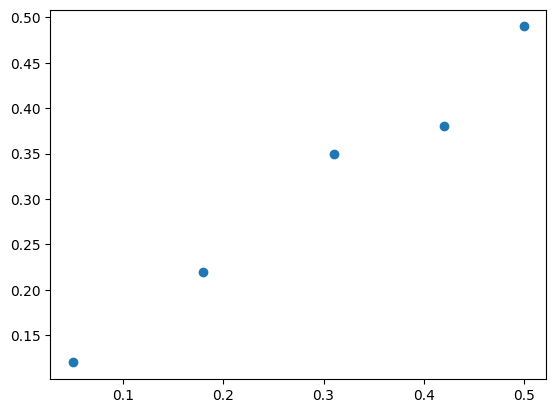

In [2]:
from numpy import array
from matplotlib import pyplot

data = array([
 [0.05, 0.12],
 [0.18, 0.22],
 [0.31, 0.35],
 [0.42, 0.38],
 [0.5, 0.49],
 ])

print(data)

X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))

# plot dataset
pyplot.scatter(X, y)
pyplot.show()

## Resolver o problema

A função do numpy linalg.solve resolve de um sistema linear de equações.
O primeiro argumento é a matriz resultante de  np.dot(X.T,X).
O segundo argumento é o vetor resultante de  np.dot(X.T,y).


Em resumo, o código está resolvendo o sistema de equações normais na forma matricial para encontrar os coeficientes (b) que minimizam o erro na regressão linear.

b value:  [1.00233226]


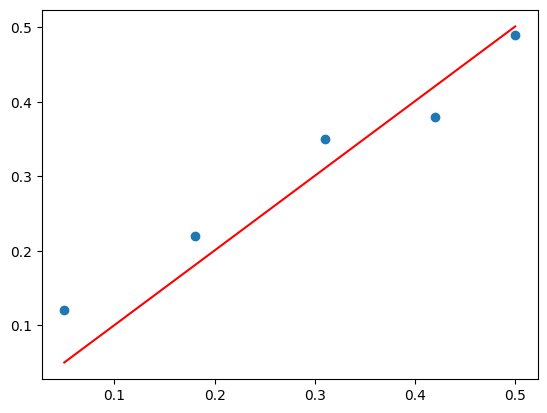

In [5]:
import numpy as np

b = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print("b value: ", b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Temos o  gráfico de dispersão do conjunto de dados com uma linha representando o modelo, mostrando um fit razoável aos dados.